In [122]:
import time
!pip install -q pyomo
#Below snip of code install the GLPK solver into current python session
!apt-get install -y -qq glpk-utils
from pyomo.environ import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

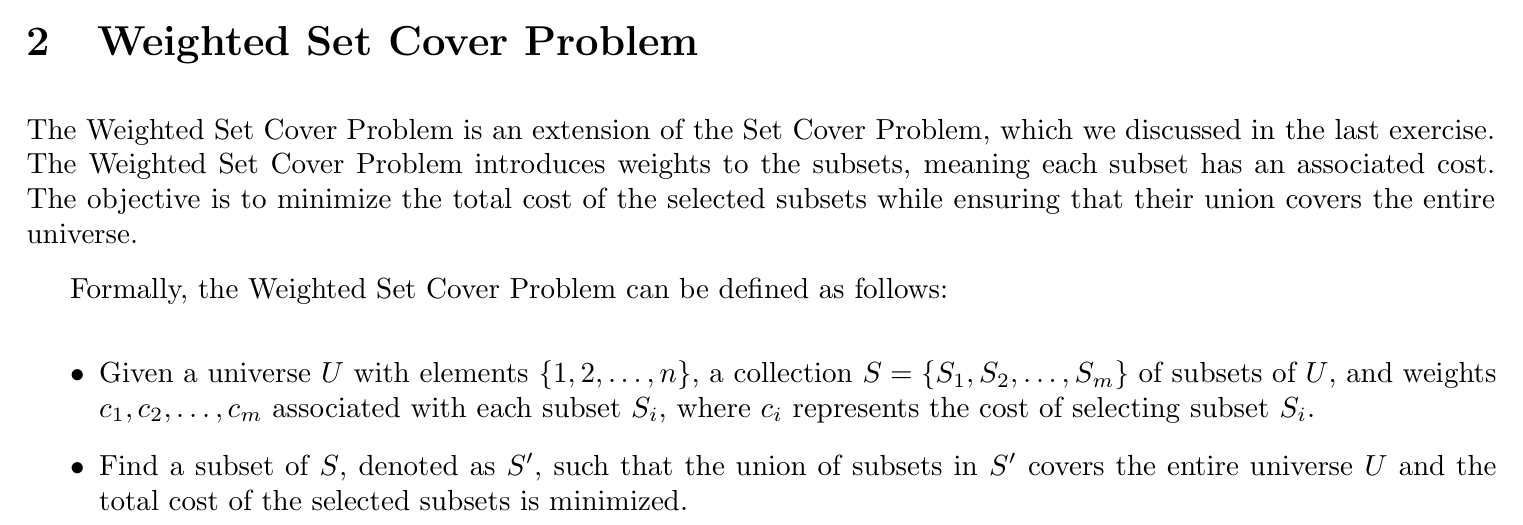

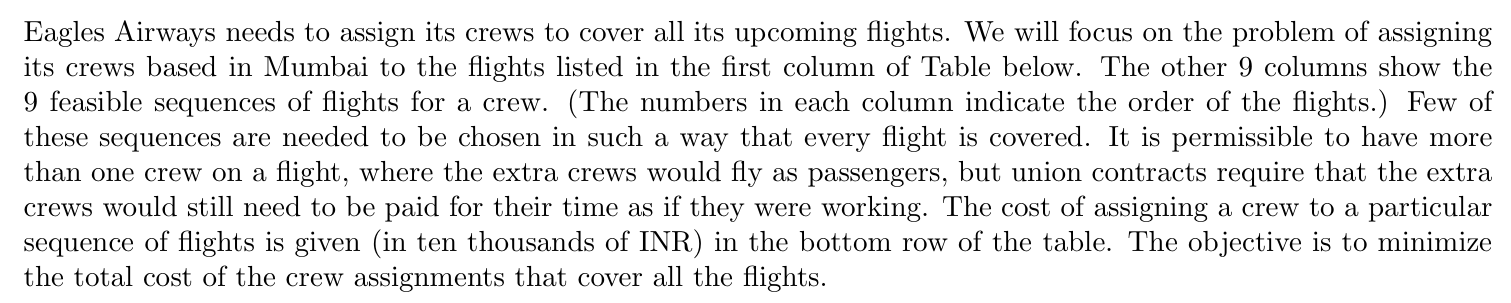

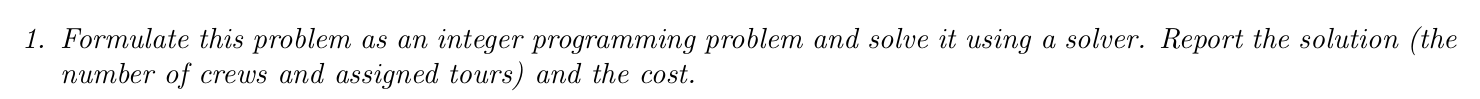

Let us start with defining our variables, our crews (A,B..), I represent as numbers in i from 0 to 8, let our variable $y_i$ be:

$y_i \begin{cases}
1 & \text{if $i^{th}$ crew is choosen} \\
0 & \text{otherwise}
\end{cases}
$

Since, if we choose the crew $i$ then we can cover a flights mentioned in the sequence. Also let us assume the cost for each crew taken  as $c$ where $\textbf{c[i]}$ will represent the cost of taking crew $i$.


Now let us represent the flights taken by crews. I take variable $a_{ij}$ representing as 1 if flight $i$ is handled by crew $j$.

Let us represent a varible $a_{ij}$ as:
$a_{ij} \begin{cases} 1 & \text{flight i is covered by crew j} \\
0 & \text{otherwise} \end{cases}$

Then our integer program will become:

Objective: $$ \min \sum_{i=0}^{8}c_iy_i $$
Such that : we need to cover each flight atleast once, hence,

$$ \sum_{j = 0}^{8}a_{ij}y_j \geq 1 \ \ \ ∀ \ i = 0,2,...8$$

The objective is to choose as minimum crews as possible, such that for each flight i is covered atleast once. This is ensured as, for each flight $i$ atleast one crew is choosen.

In [123]:
#creating incidence matrix from table

A = np.array([[1, 0, 0, 1, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 1, 0, 1, 0],
              [0, 0, 1, 0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 1],
              [0, 1, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 1, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 0, 1, 0, 0],
              [1, 0, 0, 0, 0, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 1, 0, 1, 0],
              [0, 0, 0, 1, 1, 0, 1, 0, 1],
              [0, 1, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 1, 0, 1, 0, 1, 0]])

c = np.array([45,45,45,45,35,55,55,60,60])


tours = ['Mumbai to Chennai','Mumbai to Guwahati','Mumbai to Delhi','Delhi to Mumbai','Delhi to Chennai','Delhi to Kolkata','Kolkata to Chennai','Kolkata to Delhi','Chennai to Mumbai','Chennai to Kolkata','Chennai to Guwahati','Guwahati to Delhi','Guwahati to Mumbai','Guwahati to Chennai']

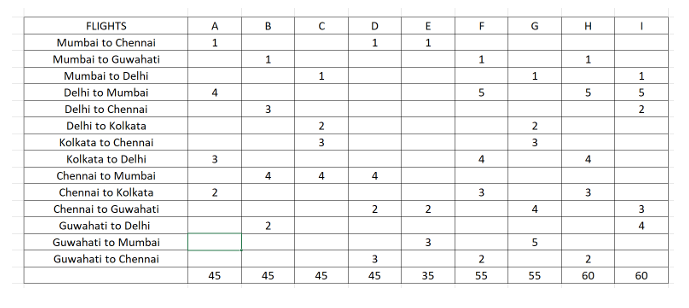

In [124]:
A.shape

(14, 9)

In [125]:
model = ConcreteModel()
model.y = Var(range(9), domain = Binary)
model.obj = Objective(expr = sum(model.y[i]*c[i] for i in range(9)), sense = minimize)

model.constraints = ConstraintList()
for i in range(14):
  model.constraints.add(expr = sum(A[i][j]*model.y[j] for j in range(9)) >= 1)
time2_1 = time.time()
result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)
time2_1 = time.time() - time2_1

In [126]:
model.pprint()

1 Var Declarations
    y : Size=9, Index={0, 1, 2, 3, 4, 5, 6, 7, 8}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 45*y[0] + 45*y[1] + 45*y[2] + 45*y[3] + 35*y[4] + 55*y[5] + 55*y[6] + 60*y[7] + 60*y[8]

1 Constraint Declarations
    constraints : Size=14, Index={1, 2, 3, 4, 5, 6, 7, 8,

In [127]:
result.solver.termination_condition

<TerminationCondition.optimal: 'optimal'>

In [128]:
result.solver.status

<SolverStatus.ok: 'ok'>

In [129]:
model.obj()

180.0

In [130]:
#values of variables
try:
  print('Decision Variables for our model : ')
  for i in range(9):
    print(f'y{i} : ', model.y[i].value)
except:
  print("Problem has  Other than Optimal.")

Decision Variables for our model : 
y0 :  0.0
y1 :  1.0
y2 :  1.0
y3 :  0.0
y4 :  1.0
y5 :  1.0
y6 :  0.0
y7 :  0.0
y8 :  0.0


This tells us that, we need to take crew  1, 2, 4, 5:

Meaning, crew , **B,C,E,F**. And the total cost will be **180**.

If we observe just the columns of B,C,E,F:


In [131]:
BCEF= np.array([[0, 0, 1, 0],
                [1, 0, 0, 1],
                [0, 1, 0, 0],
                [0, 0, 0, 1],
                [1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 0, 1],
                [1, 1, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 1, 0],
                [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

print(np.sum(BCEF, axis = 1))

[1 2 1 1 1 1 1 1 2 1 1 1 1 1]


We see that, flights 2, and 9 (which are: Mumbai to Guwahati, Chennai to Mumbai) are covered twice by two crews.

In [132]:
crew = ['B', 'C', 'E', 'F']
for j in range(4):
  print(f'Crew {crew[j]} assigned:', end = ' ')
  for i in range(14):
    if BCEF[i,j]>0:
      print(f'{tours[i]}', end = '|')
  print('\n ---------------------------------')

Crew B assigned: Mumbai to Guwahati|Delhi to Chennai|Chennai to Mumbai|Guwahati to Delhi|
 ---------------------------------
Crew C assigned: Mumbai to Delhi|Delhi to Kolkata|Kolkata to Chennai|Chennai to Mumbai|
 ---------------------------------
Crew E assigned: Mumbai to Chennai|Chennai to Guwahati|Guwahati to Mumbai|
 ---------------------------------
Crew F assigned: Mumbai to Guwahati|Delhi to Mumbai|Kolkata to Delhi|Chennai to Kolkata|Guwahati to Chennai|
 ---------------------------------


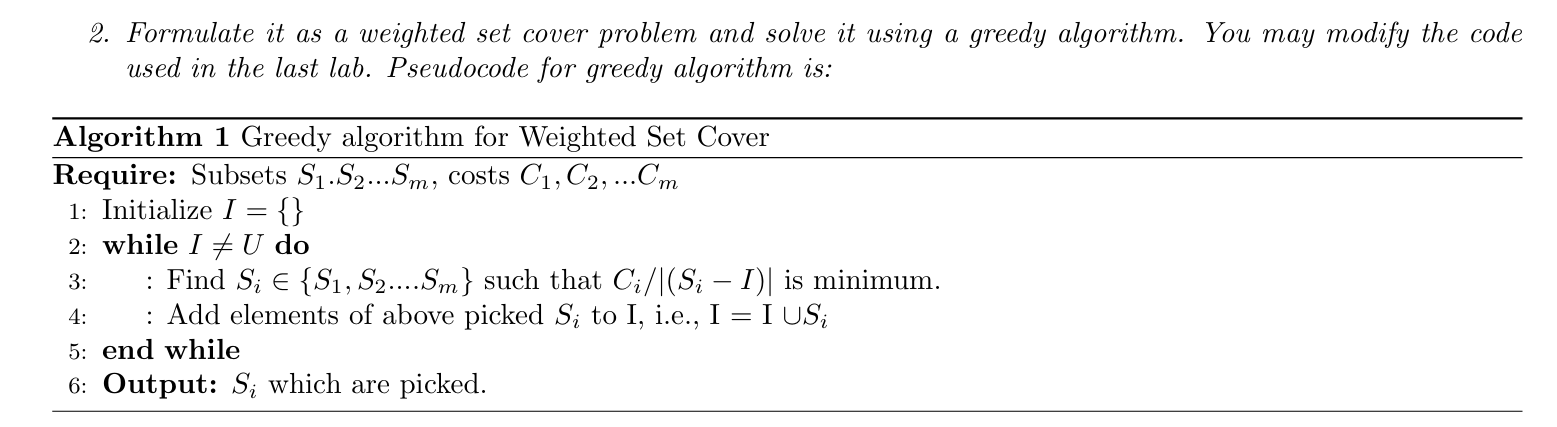

I represent flights as $\{0,2,3....13\}$, then our problem becomes to pick certain subsets such that their union is the universal set fo flights. Here the subsets will be the set of flights that are covered by each crew. Hence for example for crew A, the set is $\{ 0, 3, 7, 9 \}$

In [133]:
#creating subset from incidence matrix
S = []
for i in range(9):
  s = []
  for j in range(14):
    if A[j,i]>0:
      s.append(j)
  S.append(set(s))

U = set([i for i in range(14)])

S

[{0, 3, 7, 9},
 {1, 4, 8, 11},
 {2, 5, 6, 8},
 {0, 8, 10, 13},
 {0, 10, 12},
 {1, 3, 7, 9, 13},
 {2, 5, 6, 10, 12},
 {1, 3, 7, 9, 13},
 {2, 3, 4, 10, 11}]

In [134]:
def greedy(S, U):
  I = set()
  index_store = []
  j = 0
  start_time = time.time()
  while I != U:
    # to find the max intersection element set
    min_element_set_index = 0
    min_cost = 1e10
    for i in range(len(S)):
      if len(S[i].difference(I)) > 0:
        cost = c[i]/len(S[i].difference(I))
        if cost < min_cost:
          min_element_set_index = i
          min_cost = cost
    #to add those elements in the set
    index_store.append(min_element_set_index)
    for element in S[min_element_set_index]:
      I.add(element)
    print("I after this step: ", I)
  time_taken = time.time() - start_time
  return index_store, time_taken

In [135]:
index_store, time_taken = greedy(S,U)

I after this step:  {1, 3, 7, 9, 13}
I after this step:  {1, 2, 3, 5, 6, 7, 9, 10, 12, 13}
I after this step:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
I after this step:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}


In [136]:
index_store

[5, 6, 1, 4]

It shows that crew {1, 4, 5 ,6} need to be chosen which are {B, E, F, G}

In [137]:
time2_2 = time_taken

In [138]:
co = 0
for i in index_store:
  co += c[i]
print("Cost for this subset selected is: ", co)

Cost for this subset selected is:  190


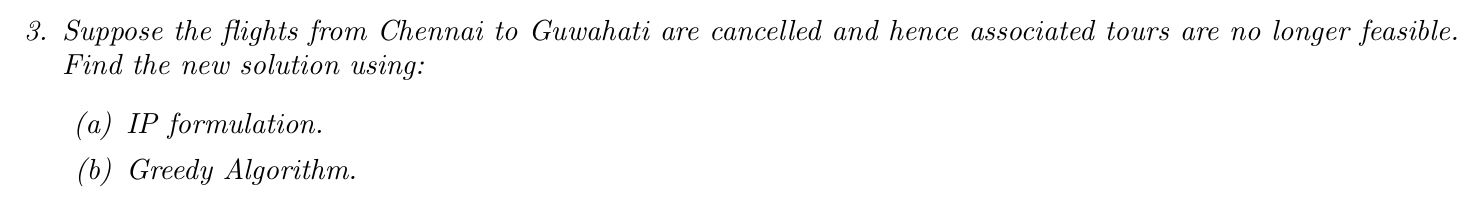

**NOTE**: **If flights from Chennai to Guwahati are cancelled, then all the crews that had a sequence of this flight will also be removed. Hence, the crew { D, E, G, I } will not operate. Meaning, {3,4,6,8} columns will be removed.**

In [139]:
tours

['Mumbai to Chennai',
 'Mumbai to Guwahati',
 'Mumbai to Delhi',
 'Delhi to Mumbai',
 'Delhi to Chennai',
 'Delhi to Kolkata',
 'Kolkata to Chennai',
 'Kolkata to Delhi',
 'Chennai to Mumbai',
 'Chennai to Kolkata',
 'Chennai to Guwahati',
 'Guwahati to Delhi',
 'Guwahati to Mumbai',
 'Guwahati to Chennai']

In [140]:
#removing chennai to guwahati row in A

In [141]:
A = np.array([[1, 0, 0, 0, 0],
              [0, 1, 0, 1, 1],
              [0, 0, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 1, 1]])

c = np.array([45,45,45,45,35,55,55,60,60])

**One More Important Once we remove those rows, Note that last second row (guwahati to mumbai) becomes 0 and no flights are scheduled there, So we will remove that row as well**

In [142]:
#creating new incidence matrix from table

A = np.array([[1, 0, 0, 0, 0],
              [0, 1, 0, 1, 1],
              [0, 0, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 0, 0, 0],
              [0, 0, 0, 1, 1]])

c = np.array([45,45,45,55,60])

new_tour = ['Mumbai to Chennai','Mumbai to Guwahati','Mumbai to Delhi','Delhi to Mumbai',
            'Delhi to Chennai','Delhi to Kolkata','Kolkata to Chennai','Kolkata to Delhi',
            'Chennai to Mumbai','Chennai to Kolkata','Guwahati to Delhi','Guwahati to Chennai']
new_crew_set = ['A', 'B', 'C', 'F', 'H']


In [143]:
A.shape

(12, 5)

In [144]:
model = ConcreteModel()
model.y = Var(range(5), domain = Binary)
model.obj = Objective(expr = sum(model.y[i]*c[i] for i in range(5)), sense = minimize)

model.constraints = ConstraintList()
for i in range(12):
  model.constraints.add(expr = sum(A[i][j]*model.y[j] for j in range(5)) >= 1)
time2_3_1 = time.time()
result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)
time2_3_1 = time.time() - time2_3_1

In [145]:
model.pprint()

1 Var Declarations
    y : Size=5, Index={0, 1, 2, 3, 4}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 45*y[0] + 45*y[1] + 45*y[2] + 55*y[3] + 60*y[4]

1 Constraint Declarations
    constraints : Size=12, Index={1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}, Active=True
        Key : Lower : Body                                     : Upper : Active
          1 :   1.0 : y[0] + 0*y[1] + 0*y[2] + 0*y[3] + 0*y[4] :  +Inf :   True
          2 :   1.0 :     0*y[0] + y[1] + 0*y[2] + y[3] + y[4] :  +Inf :   True
          3 :   1.0 : 0*y[0

In [146]:
result.solver.termination_condition

<TerminationCondition.optimal: 'optimal'>

In [147]:
result.solver.status

<SolverStatus.ok: 'ok'>

In [148]:
model.obj()

190.0

In [149]:
#values of variables
try:
  print('Decision Variables for our model : ')
  for i in range(5):
    print(f'y{i} : ', model.y[i].value)
except:
  print("Problem has  Other than Optimal.")

Decision Variables for our model : 
y0 :  1.0
y1 :  1.0
y2 :  1.0
y3 :  1.0
y4 :  0.0


In [150]:
new_crew_set

['A', 'B', 'C', 'F', 'H']

This tells us that, we need to take crew  0,1,2,3:

Meaning, crew , **A, B,C,F**. And the total cost will be **190**.

If we observe just the columns of B,C,E,F:


In [151]:
time2_3_1

0.021079301834106445

In [152]:
ABCF= np.array([[1, 0, 0, 0, 0],
              [0, 1, 0, 1, 1],
              [0, 0, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 1, 0, 0],
              [1, 0, 0, 1, 1],
              [0, 1, 0, 0, 0],
              [0, 0, 0, 1, 1]])

print(np.sum(ABCF, axis = 1))

[1 3 1 3 1 1 1 3 2 3 1 2]


We see that, too many flights have repeating crews.

I represent flights as $\{0,2,3....11\}$, then our problem becomes to pick certain subsets such that their union is the universal set fo flights. Here the subsets will be the set of flights that are covered by each crew. Hence for example for crew A, the set is $\{ 0, 3, 7, 9 \}$

In [153]:
A.shape

(12, 5)

In [154]:
#creating subset from incidence matrix
S = []
for i in range(5):
  s = []
  for j in range(12):
    if A[j,i]>0:
      s.append(j)
  S.append(set(s))

U = set([i for i in range(12)])

S

[{0, 3, 7, 9}, {1, 4, 8, 10}, {2, 5, 6, 8}, {1, 3, 7, 9, 11}, {1, 3, 7, 9, 11}]

In [155]:
index_store, time2_3_2 = greedy(S,U)

I after this step:  {1, 3, 7, 9, 11}
I after this step:  {1, 2, 3, 5, 6, 7, 8, 9, 11}
I after this step:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
I after this step:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [156]:
index_store

[3, 2, 1, 0]

It shows that crew {0,1,2,3} need to be chosen which are **A, B,C,F**

In [157]:
time2_3_2

0.0047452449798583984

In [158]:
co = 0
for i in index_store:
  co += c[i]
print("Cost for this subset selected is: ", co)

Cost for this subset selected is:  190


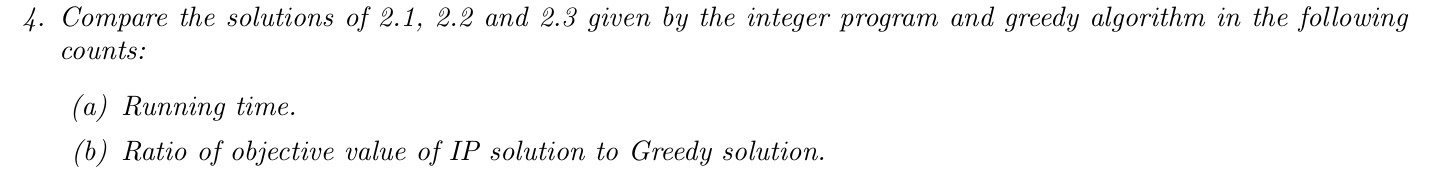

In [159]:
print("time2_1 : ",time2_1)
print("time2_2 : ",time2_2)
print("time2_3_1: ", time2_3_1)
print("time2_3_2: ", time2_3_2)

time2_1 :  0.012896537780761719
time2_2 :  0.00023555755615234375
time2_3_1:  0.021079301834106445
time2_3_2:  0.0047452449798583984


Time for Greedy for 2.3 is the lowest at 0.0002, second lowest is also for greedy. Where as ILP takes longer time as it tries to find the most optimal. But greedy doesn't do that. So, in general we can say that greedy is faster then ILP

In [160]:
objv = [180, 190, 190, 190]
print("Ratio of ILP to Greedy for 2.1 and 2.2: ", objv[0]/objv[1])
print("Ratio of ILP to Greedy for 2.3: ", objv[2]/objv[3])

Ratio of ILP to Greedy for 2.1 and 2.2:  0.9473684210526315
Ratio of ILP to Greedy for 2.3:  1.0


We observe that ILP is better objective for 2.1 as it gives cost of 180, but for second type of problem 2.3 both perform same. This is also because the crew size was reduced and there weren't more optimal solutions.